In [1]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',input_shape=(200,200,3)))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))


model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))


model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 200, 200, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 64)      3

In [2]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True    
)


val_data = ImageDataGenerator(
    rescale=1./255
)

test_data = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_data.flow_from_directory(
    'chest_img/train',
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_data.flow_from_directory(
    'chest_img/val',
    target_size=(200,200),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_data.flow_from_directory(
    'chest_img/test',
    target_size=(200,200),
    batch_size=16,
    class_mode='binary'
)

Found 2075 images belonging to 2 classes.
Found 416 images belonging to 2 classes.
Found 404 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 300,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = 30
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
300/300 [==============================] - 73s 243ms/step - loss: 2.6099 - accuracy: 0.6771 - val_loss: 2.7405 - val_accuracy: 0.5125
Epoch 2/10
300/300 [==============================] - 74s 248ms/step - loss: 0.3683 - accuracy: 0.8520 - val_loss: 2.3673 - val_accuracy: 0.5063
Epoch 3/10
300/300 [==============================] - 77s 256ms/step - loss: 0.3326 - accuracy: 0.8667 - val_loss: 0.5135 - val_accuracy: 0.6750
Epoch 4/10
300/300 [==============================] - 77s 256ms/step - loss: 0.3143 - accuracy: 0.8757 - val_loss: 0.4137 - val_accuracy: 0.8104
Epoch 5/10
300/300 [==============================] - 76s 253ms/step - loss: 0.2932 - accuracy: 0.8803 - val_loss: 0.2212 - val_accuracy: 0.9042
Epoch 6/10
300/300 [==============================] - 75s 252ms/step - loss: 0.2818 - accuracy: 0.8895 - val_loss: 0.2164 - val_accuracy: 0.9125
Epoch 7/10
300/300 [==============================] - 

Accuracy :  0.862562608718872
Loss :  0.5251093685626984

Validation_acc :  0.7972916662693024
Validation_loss :  0.7435367122292519


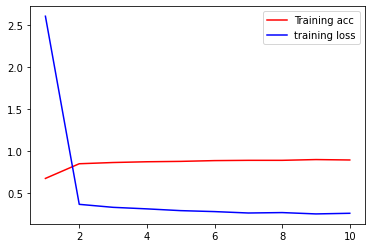

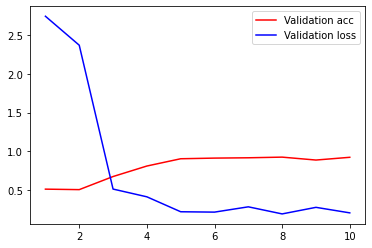

30/30 [==============================] - 1s 34ms/step - loss: 0.5893 - accuracy: 0.7286
test acc :  0.7286324501037598
test loss :  0.5893456339836121


In [7]:
import numpy as np

history_data = history.history

accuracy = history_data['accuracy']
validation_acc =history_data['val_accuracy']
loss = history_data['loss']
validation_loss = history_data['val_loss']


mean_acc = np.mean(accuracy)
mean_loss = np.mean(loss)
mean_val_acc = np.mean(validation_acc)
mean_val_loss = np.mean(validation_loss)

print("Accuracy : " , mean_acc)
print("Loss : " , mean_loss)
print()
print("Validation_acc : ", mean_val_acc)
print("Validation_loss : ", mean_val_loss)

epochs = range(1,len(accuracy)+1,1)

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='training loss')
plt.legend()
plt.show()

plt.plot(epochs, validation_acc, 'r', label='Validation acc')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.legend()
plt.show()


test_loss, test_acc = model.evaluate(test_generator,steps=30)
print("test acc : ", test_acc)
print("test loss : ", test_loss)

In [ ]:
model.save_weights('bmodel.h5')